# IMPORTACION DE LIBRERIAS

In [ ]:
import pandas as pd
import seaborn as sbn
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from joblib import dump

# PREPROCESO

Importacion de los datos del dataset y mostrar las primeras y ultimas filas de este

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Mpostrar parametros estadisticos

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mostrar un mapa de calor de las variables

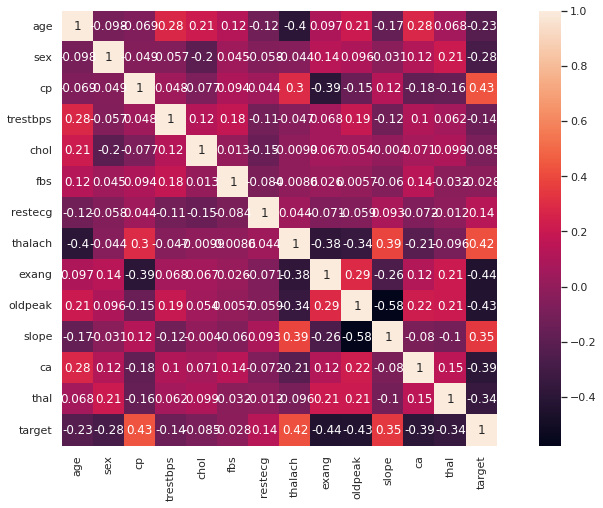

In [ ]:
sbn.set(rc = {'figure.figsize':(15,8)})
sbn.heatmap(heart.corr(), square=True, annot=True)

Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_heart = heart.drop('target', axis = 1)
y_heart = heart['target']
y_heart

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_heart,y_heart, random_state=1, test_size=0.20)

# ENTRENAMIENTO Y PREDICCION

Elegir, instanciar (eligiendo unos valores concretos, por ejemplo, profundidad 3) y entrenar el modelo Y Realizar una predicción con los datos de prueba

In [ ]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train, y_train)
 
y_model = model.predict(x_test)

Mostrar el árbol de decisión resultante

In [ ]:
model_classes = ['0','1']


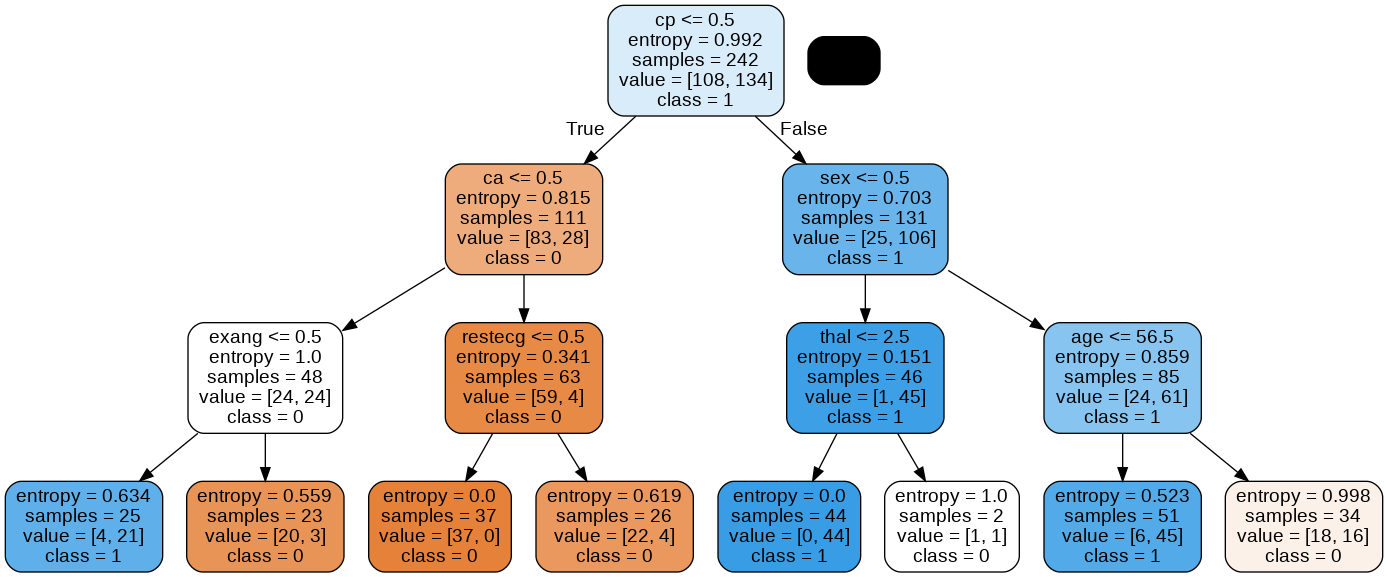

In [ ]:
dot_data = StringIO()
tree.export_graphviz(model, out_file= dot_data, rounded=True, class_names=model_classes ,feature_names= x_train.columns, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar la importancia de cada atributo en el árbol resultante

In [ ]:
model.feature_importances_

array([0.09365036, 0.09191054, 0.43295928, 0.        , 0.        ,
       0.        , 0.04063757, 0.03733229, 0.14549781, 0.        ,
       0.        , 0.15801216, 0.        ])

Almacenar el modelo de prediccion

In [ ]:
dump(model, 'corazon.joblib') 

['corazon.joblib']

# EVALUACION

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
accuracy_score(y_test,y_model)

0.7049180327868853

Mostrar la predicción realizada (imprimir la variable con la predicción)

In [ ]:
for i in (0,len(y_model)-1):
  print("prediccion: {a} real: {b}".format(a = y_model[i], b = y_heart[i]))

prediccion: 0 real: 1
prediccion: 0 real: 1


Representar gráficamente la clasificación obtenida (matriz de confusión)

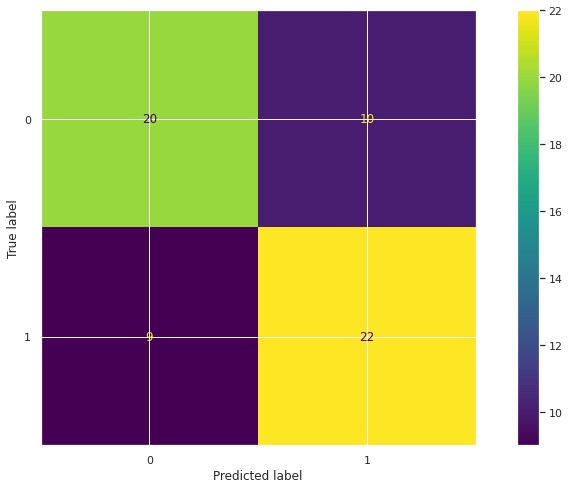

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_model)

# OPTIMIZACION

In [ ]:
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]
    model.fit(x_train_fold, y_train_fold)
    y_pred = model.predict(x_test_fold)
    acc = accuracy_score(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
kf = KFold(n_splits = 5)

for w in ['gini','entropy']:
  for k in range(1,16):
    model_opti = DecisionTreeClassifier(criterion=w, max_depth=k)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))

Para k: 1 y w: gini la media es: 0.780952380952381
Para k: 2 y w: gini la media es: 0.752295918367347
Para k: 3 y w: gini la media es: 0.8062925170068027
Para k: 4 y w: gini la media es: 0.7858843537414966
Para k: 5 y w: gini la media es: 0.8024659863945578
Para k: 6 y w: gini la media es: 0.7858843537414966
Para k: 7 y w: gini la media es: 0.7732993197278912
Para k: 8 y w: gini la media es: 0.7732142857142856
Para k: 9 y w: gini la media es: 0.7773809523809524
Para k: 10 y w: gini la media es: 0.760969387755102
Para k: 11 y w: gini la media es: 0.7608843537414965
Para k: 12 y w: gini la media es: 0.7774659863945578
Para k: 13 y w: gini la media es: 0.7774659863945579
Para k: 14 y w: gini la media es: 0.7775510204081633
Para k: 15 y w: gini la media es: 0.7693027210884354
Para k: 1 y w: entropy la media es: 0.780952380952381
Para k: 2 y w: entropy la media es: 0.7564625850340136
Para k: 3 y w: entropy la media es: 0.8224489795918368
Para k: 4 y w: entropy la media es: 0.805952380952381

In [ ]:
for w in ['gini','entropy']:
  for k in range(1,16):
    model_opti = DecisionTreeClassifier(criterion=w, max_depth=k)
    media_cruzada = validacion_cruzada_cl(model_opti,x_train,y_train,kf)
    if media_cruzada > 0.82:
      print("Para k: {k} y w: {w} la media es: {m}".format(k=k,w=w,m=media_cruzada))

Para k: 3 y w: entropy la media es: 0.8224489795918368


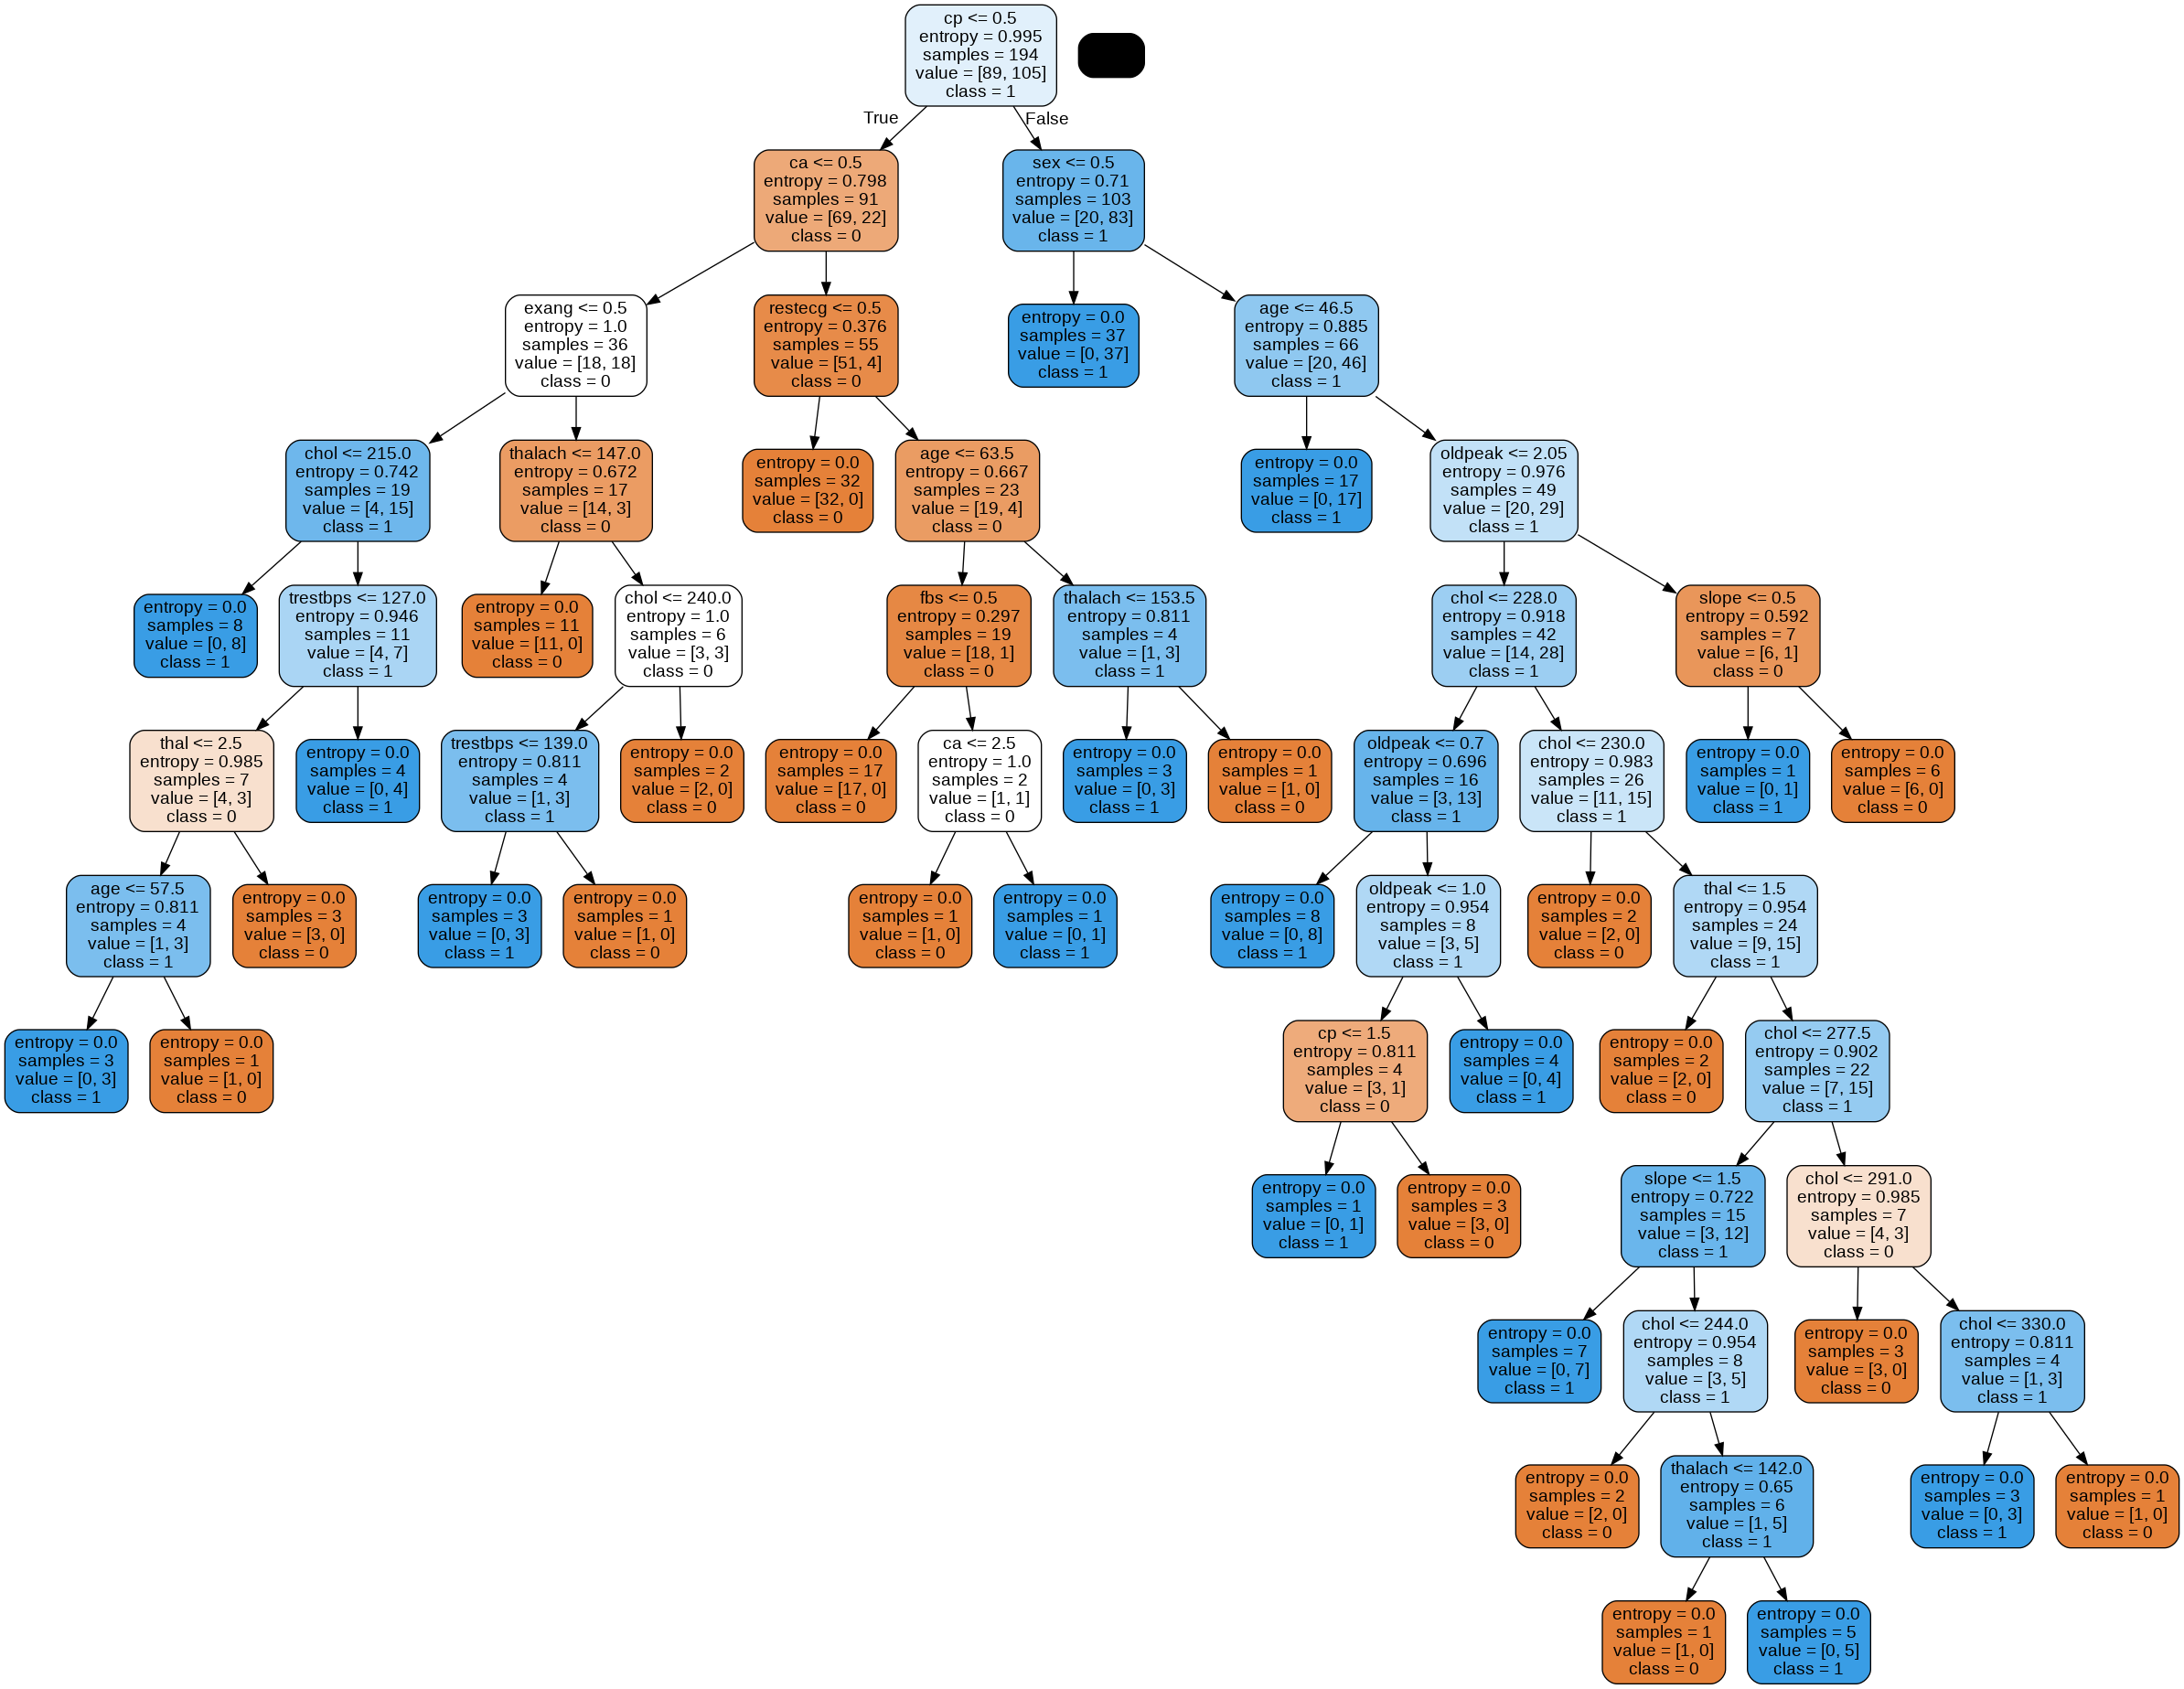

In [ ]:
dot_data2 = StringIO()
tree.export_graphviz(model_opti, out_file= dot_data2, rounded=True,class_names=model_classes ,feature_names= x_train.columns, filled = True)

graph2 = pydot.graph_from_dot_data(dot_data2.getvalue())
Image(graph2[0].create_png())